In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


In [28]:
df = pl.read_parquet(r'C:\Users\dadoi\OneDrive\Desktop\davide\example_data_week5\output\extract\polygon_df/plot_15.parquet')

In [31]:
df = df.drop_nans().drop_nulls()
df

Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path,zcam
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str,f32
563602.330259,5.7130e6,0.029493,0.093151,0.031659,0.221278,0.604644,187.796906,"""plot_15""",19.735611,24.607241,-9.450069,26.359441,0.642676,53.18,1.937465,61.620248,61.620248,563626.9375,5713015.5,47.119053,49.388344,"""IMG_0118_6.tif""",207.532516
563602.337563,5.7130e6,0.030599,0.093474,0.034721,0.21955,0.611798,187.796844,"""plot_15""",19.735672,24.599937,-9.450161,26.352656,0.642801,53.169998,1.937568,61.626127,61.626127,563626.9375,5713015.5,47.119053,49.388344,"""IMG_0118_6.tif""",207.532516
563602.344867,5.7130e6,0.031654,0.090612,0.037847,0.208981,0.606859,187.796616,"""plot_15""",19.735901,24.592633,-9.450252,26.34587,0.64293,53.16,1.937671,61.63201,61.63201,563626.9375,5713015.5,47.119053,49.388344,"""IMG_0118_6.tif""",207.532516
563602.352171,5.7130e6,0.028879,0.082323,0.037458,0.194823,0.578757,187.796341,"""plot_15""",19.736176,24.585329,-9.450344,26.339085,0.64306,53.16,1.937773,61.637895,61.637895,563626.9375,5713015.5,47.119053,49.388344,"""IMG_0118_6.tif""",207.532516
563602.359475,5.7130e6,0.024114,0.068315,0.034047,0.160133,0.511884,187.790787,"""plot_15""",19.74173,24.578025,-9.450436,26.3323,0.643319,53.139999,1.937876,61.643783,61.643783,563626.9375,5713015.5,47.119053,49.388344,"""IMG_0118_6.tif""",207.532516
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563609.002072,5.7130e6,0.006671,0.017677,0.01245,0.063654,0.138653,187.707642,"""plot_15""",19.891418,-1.127072,29.044993,29.066853,0.600134,55.610001,-0.038785,-121.895394,238.104606,563607.875,5713051.5,74.087372,119.67318,"""IMG_0196_6.tif""",207.59906
563609.009376,5.7130e6,0.006885,0.0233,0.011962,0.076096,0.180525,187.705734,"""plot_15""",19.893326,-1.134376,29.044901,29.067045,0.600175,55.610001,-0.039036,-121.909787,238.090213,563607.875,5713051.5,74.087372,119.67318,"""IMG_0196_6.tif""",207.59906
563609.01668,5.7130e6,0.0074,0.029942,0.011203,0.091568,0.235254,187.703674,"""plot_15""",19.895386,-1.14168,29.04481,29.06724,0.600221,55.610001,-0.039287,-121.924181,238.075819,563607.875,5713051.5,74.087372,119.67318,"""IMG_0196_6.tif""",207.59906


In [30]:
df = df.with_columns(
    (pl.col("delta_z")+pl.col("elev")).alias("zcam")
)
drone_positions = (
    df.select(["xcam", "ycam","zcam"])      # keep only the two columns of interest
      .unique()                # drop duplicate rows
)
drone_positions

xcam,ycam,zcam
f32,f32,f32
563603.4375,5.713044e6,207.592514
563608.8125,5.713026e6,207.558868
563597.25,5.713005e6,207.57222
563584.3125,5713016.5,207.565369
563601.125,5713017.5,207.567322
…,…,…
563612.0625,5713007.5,207.546082
563585.75,5713027.5,207.585037
563607.875,5713051.5,207.59906


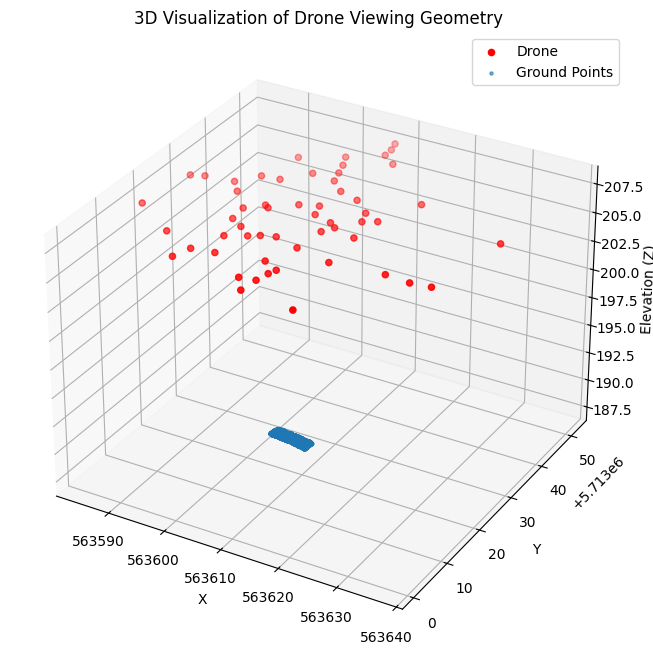

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
subsample = df.sample(10000)
# Drone position
ax.scatter(drone_positions["xcam"], drone_positions["ycam"], drone_positions["zcam"], c='red', label="Drone")
ax.scatter(subsample["Xw"], subsample["Yw"], subsample["elev"], s=5, alpha=0.6, label="Ground Points")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()
